**Importing Dependencies**

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

**Loading Dataset**

In [2]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
columns = ['ID', 'Diagnosis'] + [f'Feature_{i}' for i in range(1, 31)]
data = pd.read_csv(url, header=None, names=columns)

**Looking into Data**

In [3]:
# Show the first 5 rows
print(data.head())

         ID Diagnosis  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
0    842302         M      17.99      10.38     122.80     1001.0    0.11840   
1    842517         M      20.57      17.77     132.90     1326.0    0.08474   
2  84300903         M      19.69      21.25     130.00     1203.0    0.10960   
3  84348301         M      11.42      20.38      77.58      386.1    0.14250   
4  84358402         M      20.29      14.34     135.10     1297.0    0.10030   

   Feature_6  Feature_7  Feature_8  ...  Feature_21  Feature_22  Feature_23  \
0    0.27760     0.3001    0.14710  ...       25.38       17.33      184.60   
1    0.07864     0.0869    0.07017  ...       24.99       23.41      158.80   
2    0.15990     0.1974    0.12790  ...       23.57       25.53      152.50   
3    0.28390     0.2414    0.10520  ...       14.91       26.50       98.87   
4    0.13280     0.1980    0.10430  ...       22.54       16.67      152.20   

   Feature_24  Feature_25  Feature_26  Featu

In [4]:
print(data.tail())

         ID Diagnosis  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
564  926424         M      21.56      22.39     142.00     1479.0    0.11100   
565  926682         M      20.13      28.25     131.20     1261.0    0.09780   
566  926954         M      16.60      28.08     108.30      858.1    0.08455   
567  927241         M      20.60      29.33     140.10     1265.0    0.11780   
568   92751         B       7.76      24.54      47.92      181.0    0.05263   

     Feature_6  Feature_7  Feature_8  ...  Feature_21  Feature_22  Feature_23  \
564    0.11590    0.24390    0.13890  ...      25.450       26.40      166.10   
565    0.10340    0.14400    0.09791  ...      23.690       38.25      155.00   
566    0.10230    0.09251    0.05302  ...      18.980       34.12      126.70   
567    0.27700    0.35140    0.15200  ...      25.740       39.42      184.60   
568    0.04362    0.00000    0.00000  ...       9.456       30.37       59.16   

     Feature_24  Feature_25  Fea

**Preprocessing**

In [5]:
# Dropping Unnecessary column
data.drop('ID', axis=1, inplace=True)

In [6]:
# Conversion of Categorical values to Numerical values
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0}) # Converting M to 1 and B to 0

In [7]:
# Checking for Null values
a=data.isnull().sum().sum()
print("No.of Null values: ",a)

No.of Null values:  0


In [8]:
# Checking for Duplicate values
num_total_rows = len(data)
num_duplicate_rows = data.duplicated().sum()
percentage_duplicates = (num_duplicate_rows / num_total_rows) * 100
print(f"Number of Rows with Duplicates: {num_duplicate_rows}")
print(f"Percentage of Duplicate Rows: {percentage_duplicates:.2f}%")

Number of Rows with Duplicates: 0
Percentage of Duplicate Rows: 0.00%


**Scaling the features**

In [9]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
scaled_data = scaler.fit_transform(data)

**Outlier Detection**

In [10]:
# Loop through all numerical columns in the DataFrame
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    # Calculate the IQR (Interquartile Range) for the current column
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers for the current column
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    # Get the number of outliers
    num_outliers = len(outliers)

    # Display the number of outliers for the specified column
    print(f"Number of outliers for '{column}': {num_outliers}")


Number of outliers for 'Diagnosis': 0
Number of outliers for 'Feature_1': 14
Number of outliers for 'Feature_2': 7
Number of outliers for 'Feature_3': 13
Number of outliers for 'Feature_4': 25
Number of outliers for 'Feature_5': 6
Number of outliers for 'Feature_6': 16
Number of outliers for 'Feature_7': 18
Number of outliers for 'Feature_8': 10
Number of outliers for 'Feature_9': 15
Number of outliers for 'Feature_10': 15
Number of outliers for 'Feature_11': 38
Number of outliers for 'Feature_12': 20
Number of outliers for 'Feature_13': 38
Number of outliers for 'Feature_14': 65
Number of outliers for 'Feature_15': 30
Number of outliers for 'Feature_16': 28
Number of outliers for 'Feature_17': 22
Number of outliers for 'Feature_18': 19
Number of outliers for 'Feature_19': 27
Number of outliers for 'Feature_20': 28
Number of outliers for 'Feature_21': 17
Number of outliers for 'Feature_22': 5
Number of outliers for 'Feature_23': 15
Number of outliers for 'Feature_24': 35
Number of outl

**Handing Outliers**

In [11]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Apply the function to remove outliers from a specific column
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    data = remove_outliers_iqr(data, column)

# Print the shape of the DataFrame to see how many rows were removed
print(f"Shape of DataFrame after removing outliers: {data.shape}")

Shape of DataFrame after removing outliers: (277, 31)


**Inspecting Preprocessed Data**

In [22]:
data.head()

,Diagnosis,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30
16,1,14.680,20.13,94.74,684.5,0.09867,0.07200,0.07395,0.05259,0.1586,...,19.07,30.88,123.40,1138.0,0.14640,0.18710,0.29140,0.16090,0.3029,0.08216
19,0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,...,15.11,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
20,0,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.03110,0.1967,...,14.50,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
21,0,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.02076,0.1815,...,10.23,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
37,0,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,0.1467,...,13.30,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169


In [12]:
data.shape #  Finding the shape of data

(277, 31)

In [13]:
data.info() # Getting info of the data

<class 'pandas.core.frame.DataFrame'>
Index: 277 entries, 16 to 566
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Diagnosis   277 non-null    int64  
 1   Feature_1   277 non-null    float64
 2   Feature_2   277 non-null    float64
 3   Feature_3   277 non-null    float64
 4   Feature_4   277 non-null    float64
 5   Feature_5   277 non-null    float64
 6   Feature_6   277 non-null    float64
 7   Feature_7   277 non-null    float64
 8   Feature_8   277 non-null    float64
 9   Feature_9   277 non-null    float64
 10  Feature_10  277 non-null    float64
 11  Feature_11  277 non-null    float64
 12  Feature_12  277 non-null    float64
 13  Feature_13  277 non-null    float64
 14  Feature_14  277 non-null    float64
 15  Feature_15  277 non-null    float64
 16  Feature_16  277 non-null    float64
 17  Feature_17  277 non-null    float64
 18  Feature_18  277 non-null    float64
 19  Feature_19  277 non-null    float

In [14]:
data.describe() # Descriptive Statistics of the data

,Diagnosis,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30
count,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,...,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000
mean,0.079422,12.657874,17.855812,81.258051,501.577617,0.091094,0.073188,0.040040,0.025884,0.170335,...,14.051430,23.869928,91.151986,616.316968,0.124900,0.173859,0.159603,0.078858,0.271772,0.076544
std,0.270886,1.665272,3.830038,11.127620,130.468302,0.011321,0.024962,0.027029,0.015289,0.019242,...,1.960982,5.510194,13.373403,171.575985,0.017722,0.072546,0.098525,0.034769,0.038415,0.009361
min,0.000000,8.196000,9.710000,51.710000,201.900000,0.062510,0.019380,0.000000,0.000000,0.121500,...,8.964000,12.020000,57.260000,242.200000,0.081250,0.034320,0.000000,0.000000,0.178300,0.055210
25%,0.000000,11.570000,15.210000,73.880000,409.100000,0.083110,0.053520,0.020450,0.016150,0.157300,...,12.970000,19.800000,83.120000,510.500000,0.111800,0.123100,0.084340,0.056900,0.243900,0.069490
50%,0.000000,12.760000,17.460000,81.370000,496.600000,0.090300,0.070810,0.035460,0.023430,0.168700,...,13.880000,23.070000,89.710000,594.700000,0.124600,0.167900,0.145600,0.079110,0.268800,0.076280
75%,0.000000,13.750000,19.630000,88.440000,584.800000,0.098790,0.088340,0.053750,0.032510,0.184700,...,15.330000,27.820000,99.700000,718.900000,0.137400,0.217000,0.224100,0.100100,0.299800,0.082160
max,1.000000,16.840000,29.430000,108.400000,880.200000,0.123700,0.166100,0.147800,0.090290,0.223800,...,19.280000,40.540000,129.800000,1138.000000,0.173300,0.390400,0.434100,0.161400,0.384900,0.101700


In [15]:
data.describe().T # Using transpose for better readability

,count,mean,std,min,25%,50%,75%,max
Diagnosis,277.0,0.079422,0.270886,0.000000,0.000000,0.000000,0.000000,1.000000
Feature_1,277.0,12.657874,1.665272,8.196000,11.570000,12.760000,13.750000,16.840000
Feature_2,277.0,17.855812,3.830038,9.710000,15.210000,17.460000,19.630000,29.430000
Feature_3,277.0,81.258051,11.127620,51.710000,73.880000,81.370000,88.440000,108.400000
Feature_4,277.0,501.577617,130.468302,201.900000,409.100000,496.600000,584.800000,880.200000
Feature_5,277.0,0.091094,0.011321,0.062510,0.083110,0.090300,0.098790,0.123700
Feature_6,277.0,0.073188,0.024962,0.019380,0.053520,0.070810,0.088340,0.166100
Feature_7,277.0,0.040040,0.027029,0.000000,0.020450,0.035460,0.053750,0.147800
Feature_8,277.0,0.025884,0.015289,0.000000,0.016150,0.023430,0.032510,0.090290
Feature_9,277.0,0.170335,0.019242,0.121500,0.157300,0.168700,0.184700,0.223800


**Visualisation of Target labels**

<ipython-input-16-8a2955085f18>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Diagnosis', data=data, palette=['#007bff', '#dc3545'])  # Change colors
<ipython-input-16-8a2955085f18>:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Benign', 'Malignant'])


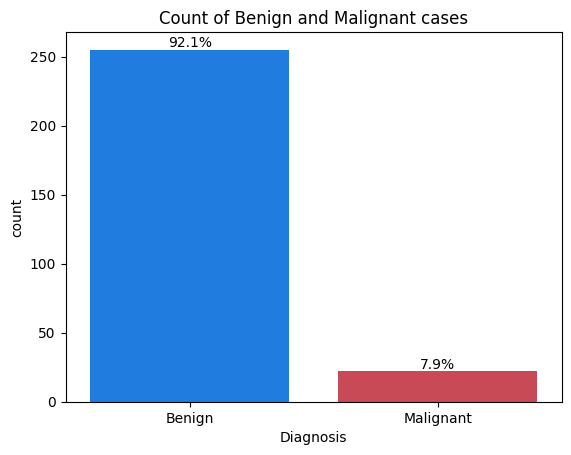

In [16]:
# Countplot of the target variable (Benign vs Malignant)
ax = sns.countplot(x='Diagnosis', data=data, palette=['#007bff', '#dc3545'])  # Change colors
plt.title('Count of Benign and Malignant cases')

# Add percentage or number on the bars
total = len(data['Diagnosis'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')
    # ax.annotate(f'{p.get_height()}', (x, y), ha='center', va='bottom') # To display number instead of percentage

# Change x-axis labels
ax.set_xticklabels(['Benign', 'Malignant'])

plt.show()

**Balancing Data**

In [17]:
# Separate features and target variable
X = data.drop('Diagnosis', axis=1)
y = data['Diagnosis']

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Resample the data
X, y = smote.fit_resample(X, y)

# Create a new balanced DataFrame
balanced_data = pd.DataFrame(X, columns=X.columns)
balanced_data['Diagnosis'] = y

# Print the shape of the balanced DataFrame
print(f"Shape of balanced DataFrame: {balanced_data.shape}")

Shape of balanced DataFrame: (510, 31)


**After Balancing data**

<ipython-input-18-bd7d36950202>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Diagnosis', data=balanced_data, palette=['#007bff', '#dc3545'])  # Change colors
<ipython-input-18-bd7d36950202>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Benign', 'Malignant'])


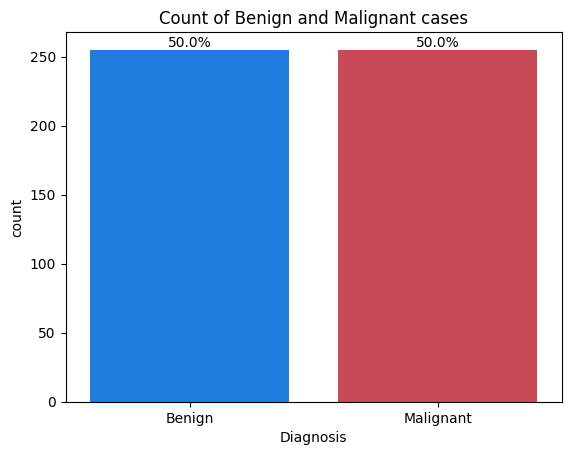

In [18]:
# Countplot of the target variable (Benign vs Malignant)
ax = sns.countplot(x='Diagnosis', data=balanced_data, palette=['#007bff', '#dc3545'])  # Change colors
plt.title('Count of Benign and Malignant cases')

# Add percentage or number on the bars
total = len(balanced_data['Diagnosis'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')
    # ax.annotate(f'{p.get_height()}', (x, y), ha='center', va='bottom') # To display number instead of percentage

# Change x-axis labels
ax.set_xticklabels(['Benign', 'Malignant'])

plt.show()

**Correlation matrix of features**

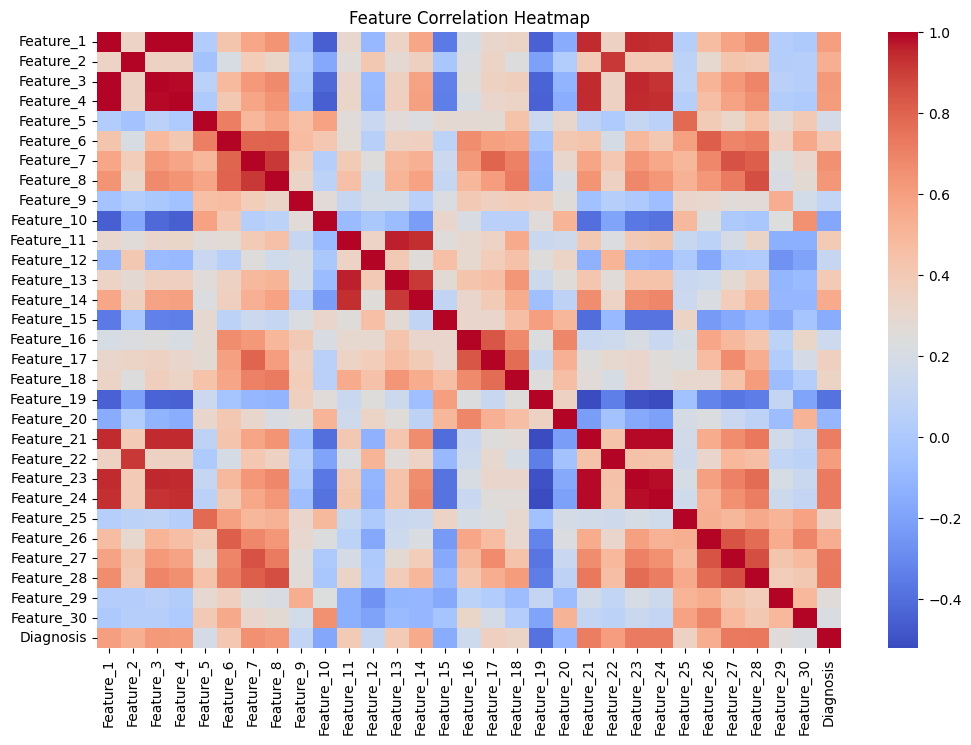

In [19]:
# Correlation heatmap to visualize relationships between features
plt.figure(figsize=(12,8))
sns.heatmap(balanced_data.corr(), annot=False, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

**Train, Test Splitting**

In [28]:
# Separate features and target variable
X = balanced_data.drop('Diagnosis', axis=1)
y = balanced_data['Diagnosis']

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f'Training data shape: {X_train.shape}')
print(f'Testing data shape: {X_test.shape}')

Training data shape: (357, 30)
Testing data shape: (153, 30)


**Initialzing & Training the Ada Boost Classifier**

In [30]:
# Create AdaBoostClassifier object
base_estimator = DecisionTreeClassifier(max_depth=1)
adaboost_classifier = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, random_state=42)

# Train the classifier
adaboost_classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

**Evaluation with Metrics**

In [35]:
# Make predictions on the testing set
y_pred = adaboost_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.9673202614379085
Precision: 0.9746835443037974
Recall: 0.9625
F1-Score: 0.9685534591194969
Confusion Matrix:
[[71  2]
 [ 3 77]]


**Confusion Matrix**

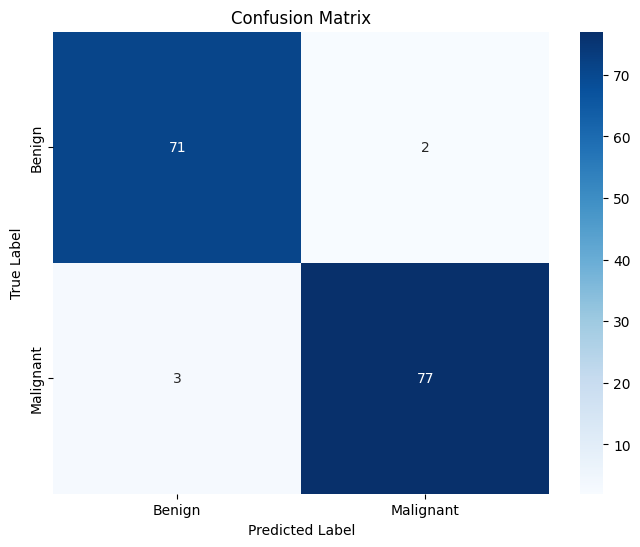

In [36]:
# Create a heatmap visualization of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Benign", "Malignant"],
            yticklabels=["Benign", "Malignant"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()